In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [3]:
import matplotlib.pyplot as plt

In [4]:
X_train[0].shape

(32, 32, 3)

In [5]:
X_train.shape

(50000, 32, 32, 3)

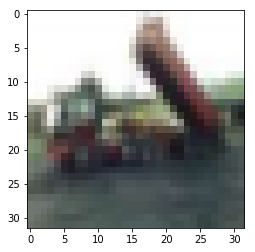

In [6]:
plt.imshow(X_train[2])

In [7]:
X_train.max()

255

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
y_train
# convert this to one hot encode

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
from keras.utils import to_categorical

In [17]:
# There are 10 classes in cifar 10
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [18]:
from keras.models import Sequential

In [19]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [20]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

# dense layers 128,256,512
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

In [22]:
model.fit(X_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
50000/50000 [==============================] - 71s 1ms/step - loss: 1.5235 - acc: 0.4531
Epoch 2/10
50000/50000 [==============================] - 64s 1ms/step - loss: 1.1741 - acc: 0.5900
Epoch 3/10
50000/50000 [==============================] - 64s 1ms/step - loss: 1.0196 - acc: 0.6488
Epoch 4/10
50000/50000 [==============================] - 61s 1ms/step - loss: 0.9110 - acc: 0.6856
Epoch 5/10
50000/50000 [==============================] - 54s 1ms/step - loss: 0.8272 - acc: 0.7157
Epoch 6/10
50000/50000 [==============================] - 54s 1ms/step - loss: 0.7652 - acc: 0.7378
Epoch 7/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.7140 - acc: 0.7571
Epoch 8/10
50000/50000 [==============================] - 54s 1ms/step - loss: 0.6630 - acc: 0.7760
Epoch 9/10
50000/50000 [==============================] - 56s 1ms/step - loss: 0.6170 - acc: 0.7916
Epoch 10/10
50000/50000 [==============================] - 52s 1ms/step - loss: 0.5779 - acc: 0.8042

In [23]:
# model evaluation
model.evaluate(X_test,y_cat_test)

10000/10000 [==============================] - 5s 526us/step


[1.2061144364356995, 0.6708]

In [24]:
from sklearn.metrics import classification_report

In [25]:
predictions = model.predict_classes(X_test)

In [27]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.78      0.58      0.66      1000
          1       0.80      0.81      0.81      1000
          2       0.46      0.72      0.56      1000
          3       0.50      0.58      0.53      1000
          4       0.64      0.64      0.64      1000
          5       0.60      0.51      0.55      1000
          6       0.86      0.65      0.74      1000
          7       0.83      0.66      0.73      1000
          8       0.69      0.84      0.76      1000
          9       0.80      0.73      0.77      1000

avg / total       0.70      0.67      0.67     10000

